In [109]:
import pandas as pd
import matplotlib
%matplotib inline
%pylab inline


UsageError: Line magic function `%matplotib` not found.


# laoding dataset using pandas

In [110]:
df = pd.read_csv("/Users/Amin/Desktop/daily-crypto-markets-and-lunardata.csv", sep=",")

/Users/Amin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df.head() 

,symbol,name,date,Month,Year,open,high,low,close,ohlc_avg,...,delta_ohlc_monthly,volume,market,close_ratio,spread,moon_dist_au,moon_declination,moon_brightness,moon_illumination_perc,moon_constellation
0,BTC,Bitcoin,4/28/2013,4,2013,135.30,135.98,132.10,134.21,134.3975,...,-4.105833,0,1.500520e+09,0.5438,3.88,0.002439,-20.14462,4.11,93.043,Oph
1,BTC,Bitcoin,4/29/2013,4,2013,134.44,147.49,134.00,144.54,140.1175,...,1.614167,0,1.491160e+09,0.7813,13.49,0.002452,-20.36451,4.39,85.813,Oph
2,BTC,Bitcoin,4/30/2013,4,2013,144.00,146.93,134.05,139.00,140.9950,...,2.491667,0,1.597780e+09,0.3843,12.88,0.002473,-19.37449,4.65,76.687,Sgr
3,BTC,Bitcoin,5/1/2013,5,2013,139.00,139.89,107.72,116.99,125.9000,...,6.277984,0,1.542820e+09,0.2882,32.17,0.002498,-17.26432,4.89,66.296,Sgr
4,BTC,Bitcoin,5/2/2013,5,2013,116.38,125.60,92.28,105.21,109.8675,...,-9.754516,0,1.292190e+09,0.3881,33.32,0.002525,-14.18093,5.12,55.287,Cap


In [178]:
df["name"].nunique()

1398

# checking and handling missing values

In [113]:
df.isnull().values.any()

True

In [114]:
df.dropna(inplace=True)
df.shape

(644847, 21)

In [131]:
df.isnull().values.any()

False

# Dropped unimportant feature

In [115]:
df2=df.drop(["name","symbol"],axis=1)
df2.head()
df2.shape

(644847, 19)

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644847 entries, 0 to 659372
Data columns (total 19 columns):
date                      644847 non-null object
Month                     644847 non-null int64
Year                      644847 non-null int64
open                      644847 non-null float64
high                      644847 non-null float64
low                       644847 non-null float64
close                     644847 non-null float64
ohlc_avg                  644847 non-null float64
monthly_avg               644847 non-null float64
delta_ohlc_monthly        644847 non-null float64
volume                    644847 non-null int64
market                    644847 non-null float64
close_ratio               644847 non-null object
spread                    644847 non-null float64
moon_dist_au              644847 non-null float64
moon_declination          644847 non-null float64
moon_brightness           644847 non-null float64
moon_illumination_perc    644847 non-null float

From above we can see we have float,int and object datatypes. 

# preprocessing of continuous valued feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1add839668>,
      dtype=object)

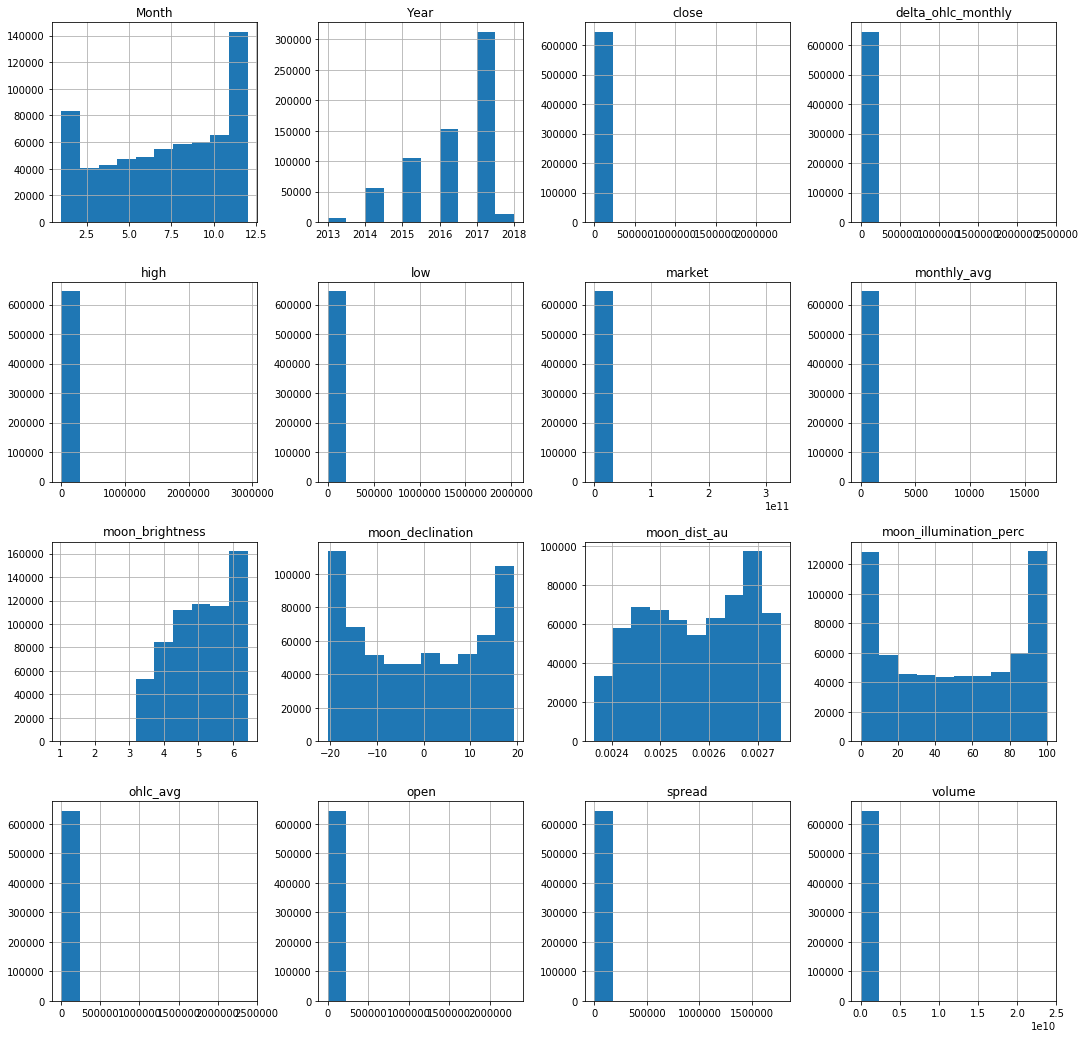

In [117]:
df2[df2.dtypes[(df2.dtypes=="float64")|(df2.dtypes=="int64")].index.values].hist(figsize=[18,18])

In [118]:
df1=df2[df2.dtypes[(df2.dtypes=="float64")|(df2.dtypes=="int64")].index.values]

In [119]:
df1.shape

(644847, 16)

# 1) Feature scaling: setting ranges between 0-1

In [120]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df1))
df_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.272727,0.0,0.000059,0.000046,0.000065,0.000058,0.000056,0.008127,0.002182,0.0,0.004603,0.000002,0.194973,0.010011,0.570632,0.930464
1,0.272727,0.0,0.000058,0.000050,0.000066,0.000063,0.000059,0.008127,0.002185,0.0,0.004574,0.000008,0.230840,0.004499,0.622677,0.858159
2,0.272727,0.0,0.000063,0.000050,0.000066,0.000060,0.000059,0.008127,0.002185,0.0,0.004901,0.000007,0.284501,0.029318,0.671004,0.766891
3,0.363636,0.0,0.000060,0.000048,0.000053,0.000051,0.000053,0.007019,0.002187,0.0,0.004733,0.000018,0.349920,0.082219,0.715613,0.662973
4,0.363636,0.0,0.000051,0.000043,0.000045,0.000046,0.000046,0.007019,0.002180,0.0,0.003964,0.000019,0.421046,0.159519,0.758364,0.552874


# Feature standardization: make it in standard normal form (mean=0, standard dev=1)

In [127]:
# Standardizing the train and test data
from sklearn.preprocessing import scale

df_scale =pd.DataFrame( scale(df_minmax))
df_scale.shape

(644847, 16)

# label encoding to handle string valued feature 

In [150]:
data = df2[["date","moon_constellation"]]

In [151]:
data.shape

(644847, 2)

In [161]:
from collections import defaultdict

d = defaultdict(LabelEncoder)

df_fit = data.apply(lambda each: d[each.name].fit_transform(each))

df_fit.head() 

,date,moon_constellation
0,911,8
1,916,8
2,925,13
3,954,13
4,1009,2


In [170]:
df_scale["date"] = df_fit["date"]
df_scale["moon_constellation"] = df_fit["moon_constellation"]

In [172]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644847 entries, 0 to 644846
Data columns (total 18 columns):
0                     644847 non-null float64
1                     644847 non-null float64
2                     644847 non-null float64
3                     644847 non-null float64
4                     644847 non-null float64
5                     644847 non-null float64
6                     644847 non-null float64
7                     644847 non-null float64
8                     644847 non-null float64
9                     644847 non-null float64
10                    644847 non-null float64
11                    644847 non-null float64
12                    644847 non-null float64
13                    644847 non-null float64
14                    644847 non-null float64
15                    644847 non-null float64
date                  630786 non-null float64
moon_constellation    630786 non-null float64
dtypes: float64(18)
memory usage: 88.6 MB


In [177]:
df_scale.to_csv("Final_data.csv")